Kepler's 3rd law:

$T^{2} = R^{3}$ 
when T is measured in years and R is measured in AU

In [1]:
import numpy as np
import pandas as pd

In [2]:
def obtain_R(T): # Find average radius(R) of an orbit given the time period(T)
    R_cube = T**2
    R = np.round(R_cube**(1./3), 5)
    return R

In [3]:
x = np.random.uniform(0,100,10000) #Genrate 10000 random time period values between 0 and 100
x

array([ 6.71379244, 15.68595472, 50.84337078, ..., 79.70694192,
       15.66282879, 44.63982568])

In [4]:
y = obtain_R(x) # Obtain avg. radius of orbit(R) for each of the 10000 generated time period values
y

array([ 3.55887,  6.26624, 13.72428, ..., 18.52099,  6.26008, 12.58389])

In [5]:
x= x.reshape(10000,1)
y = y.reshape(10000,1)

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [7]:
# Construct regression model
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(1,)))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Dense(1))
model.output_shape

(None, 1)

In [8]:
model.compile(loss='mean_absolute_error',
              optimizer=tf.keras.optimizers.Adam(0.001))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                64        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Train model
history = model.fit(
          x, y,
          validation_split=0.2,
          verbose=0, epochs=100)

In [11]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

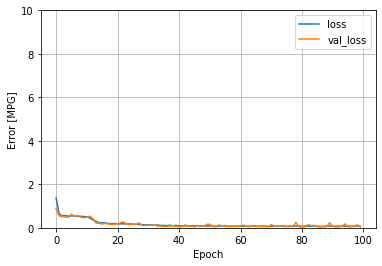

In [12]:
plot_loss(history)

This model is trained to reduce mean absolute error(MAE). MAE is the average difference between the predicted and true values

$MAE = \frac{\sum \limits_{i=1}^{n} |y_{i}-x_{i}|}{n}$

In [13]:
print("Mean absolute error of model: ", history.history['val_loss'][-1])

Mean absolute error of model:  0.04381803050637245


In [14]:
a = tf.linspace(0.0, 250, 251)
b = model.predict(a)

In [15]:
def plot_predictions(x, y):
  plt.scatter(x, y, label='Data')
  plt.plot(a, b, color='k', label='Predictions')
  plt.xlabel('T (Time period of orbit in yrs)')
  plt.ylabel('R (Average radius of orbit in AU)')
  plt.legend()

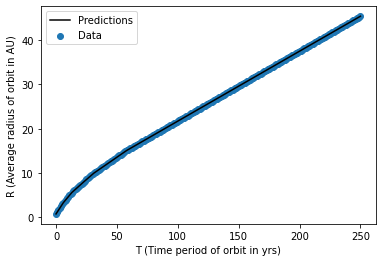

In [16]:
plot_predictions(a,b)

Predicting for earth:

In [17]:
T_earth = [1] #in years
R_earth = model.predict(T_earth) #True value: 1 AU
print("Actual dist. of eath from sun: 1 AU")
print("Dist. predicted: ", R_earth[0][0], "AU")

Actual dist. of eath from sun: 1 AU
Dist. predicted:  1.206836 AU


Predicting for jupiter:

In [18]:
T_jupiter = [11.86] #in years
R_jupiter = model.predict(T_jupiter) #True value: 5.203 AU
print("Actual dist. of jupiter from sun: 5.203 AU")
print("Dist. predicted: ", R_jupiter[0][0], "AU")

Actual dist. of jupiter from sun: 5.203 AU
Dist. predicted:  5.254774 AU


In [19]:
model.save('kepler_model.h5')